# تحميل (استيراد) المكتبات الأساسية
# Importing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# تحميل صورة الشمس 
# Load the original AIA image

In [ ]:
# Load the original AIA image
image_path = "2025_01_29_10_23_59_AIA_193.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Enhance contrast
equalized = cv2.equalizeHist(gray)

# Apply strict threshold to extract the darkest regions
_, binary_strict = cv2.threshold(equalized, 45, 255, cv2.THRESH_BINARY_INV)
    
# Morphological operations to clean the binary mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned = cv2.morphologyEx(binary_strict, cv2.MORPH_OPEN, kernel, iterations=2)
cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel, iterations=2)

# العمليات علي الصورة و استخلاص حدود الثقب الإكليلي

In [3]:
# Extract initial contours
initial_contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter based on q threshold (vertical position cutoff only)
height, width = gray.shape
margin = 30
min_area = 5000
q = 0.7985
cutoff = int(height * q)

refined_contours = []
for cnt in initial_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    area = cv2.contourArea(cnt)
    if x > margin and y > margin and (x + w) < (width - margin) and (y + h) < cutoff and area >= min_area:
        refined_contours.append(cnt)

# Create a mask from selected contours
mask = np.zeros_like(gray, dtype=np.uint8)
cv2.drawContours(mask, refined_contours, -1, 255, -1)

# Apply morphological refinement only (no additional filtering)
kernel_erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
eroded_mask = cv2.erode(mask, kernel_erode, iterations=1)
refined_mask = cv2.morphologyEx(eroded_mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Extract final contours
final_contours, _ = cv2.findContours(refined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw final contours on a copy of the original image
output_image = image.copy()
cv2.drawContours(output_image, final_contours, -1, (255, 255, 255), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 2, 7],
        [0, 2, 7],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 2, 7],
        [0, 1, 6],
        [0, 2, 7],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 2, 7],
        [0, 0, 0],
        [0, 2, 7],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

# العرض Visualization

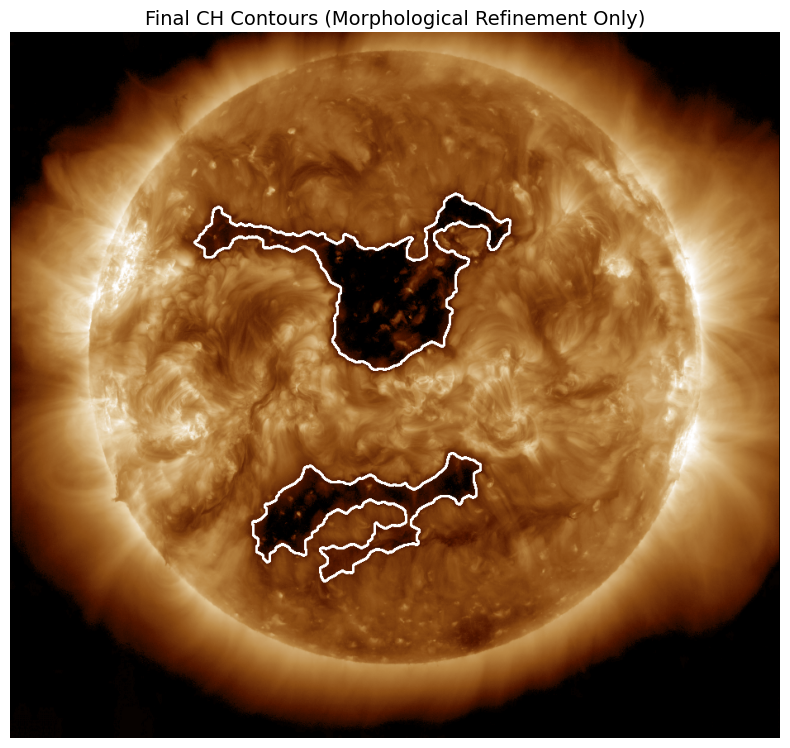

In [4]:
# Display the result
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Final CH Contours (Morphological Refinement Only)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()